<a href="https://colab.research.google.com/github/tylerscott3/CS290/blob/main/notebooks/GaussianMixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


In [34]:
# Load the dataset
penguins = sns.load_dataset("penguins")

# Preview the dataset
print(penguins.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [42]:
# Drop rows with missing values
penguins = penguins.dropna()


# Choose relevant numerical columns for clustering (ignoring categorical ones like species)
features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Standardize the data (important for GMM)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [46]:
# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, n_init=10)
gmm.fit(scaled_features)


GaussianMixture(n_components=3, n_init=10)

In [48]:
gmm.weights_

array([0.35735726, 0.44222741, 0.20041533])

In [49]:
gmm.means_

array([[ 0.65475825, -1.10270704,  1.16246301,  1.10121072],
       [-0.9434    ,  0.58857071, -0.79473959, -0.63472904],
       [ 0.91417522,  0.66750511, -0.31913207, -0.56298618]])

In [50]:
gmm.covariances_

array([[[0.3208593 , 0.18499049, 0.17629787, 0.23456627],
        [0.18499049, 0.24934412, 0.1662792 , 0.22422093],
        [0.17629787, 0.1662792 , 0.21957253, 0.20701541],
        [0.23456627, 0.22422093, 0.20701541, 0.38576109]],

       [[0.23395734, 0.10692284, 0.05910757, 0.14018182],
        [0.10692284, 0.38709852, 0.09330297, 0.20762281],
        [0.05910757, 0.09330297, 0.20272623, 0.11900321],
        [0.14018182, 0.20762281, 0.11900321, 0.32211219]],

       [[0.33730389, 0.19584381, 0.09413274, 0.1213023 ],
        [0.19584381, 0.3127768 , 0.14547845, 0.15222528],
        [0.09413274, 0.14547845, 0.2457542 , 0.14883016],
        [0.1213023 , 0.15222528, 0.14883016, 0.22282551]]])

In [51]:
gmm.converged_

True

In [52]:
gmm.n_iter_

5

In [53]:
gmm.predict(scaled_features)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [54]:
gmm.predict_proba(scaled_features).round(2)

array([[0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.98, 0.02],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.97, 0.03],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.99, 0.01],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.99, 0.01],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
 

In [55]:
X_new, y_new = gmm.sample(6)

In [58]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [59]:

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [61]:

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    X_np = X.values
    plt.plot(X_np[:, 0], X_np[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("x1")
    if show_ylabels:
        plt.ylabel("x2", rotation=0)
    else:
        plt.tick_params(labelleft=False)



In [64]:
df2Features = scaled_features[:, [0, 1]]  # Select columns 0 and 1, corresponding to 'bill_length_mm' and 'bill_depth_mm'

In [65]:

gm2 = GaussianMixture(n_components=3, n_init=10)

In [66]:

gm2.fit(df2Features)

GaussianMixture(n_components=3, n_init=10)

NameError: name 'df2_eatures' is not defined

<Figure size 800x400 with 0 Axes>

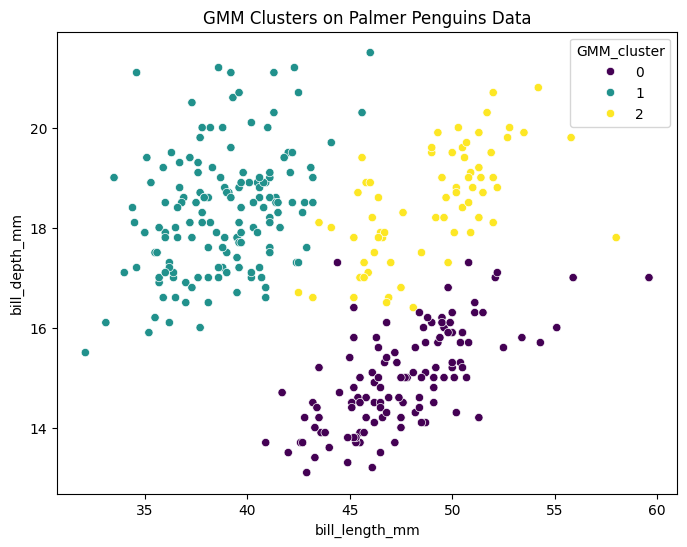

In [62]:
# Plot the clusters against some features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='GMM_cluster', palette='viridis')
plt.title('GMM Clusters on Palmer Penguins Data')
plt.show()


In [38]:
# Compare predicted clusters with the actual species
pd.crosstab(penguins['species'], penguins['GMM_cluster'])


GMM_cluster,0,1,2
species,,,
Adelie,0,144,2
Chinstrap,0,3,65
Gentoo,119,0,0
